# Script: Decision Tree Classifier for Bank Marketing Dataset
 Purpose: Predict whether a customer will purchase a product or service based on demographic and behavioral data.
 
 Dataset: Bank Marketing Dataset (UCI Machine Learning Repository)


In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\anees\OneDrive\Desktop\ENTRI DSML\Untitled Folder\bank-full.csv',sep=";", quotechar='"')


In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Understand the Data

In [4]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Check missing values

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Encode Categorical Variables

In [8]:
# Identify categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [9]:
#Encode the target variable
data['y'] = data['y'].map({'no': 0, 'yes': 1})


In [10]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


Split the Data

In [11]:
from sklearn.model_selection import train_test_split
# Features and target
X = data.drop('y', axis=1)
y = data['y']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (31647, 42)
Test set size: (13564, 42)


# Decision Tree classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Initialize the Decision Tree Classifier
dt= DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
y_pred = dt.predict(X_test)

In [14]:
 # Measure accuracy and other metrics.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.90


In [16]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.65      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [17]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[11666   300]
 [ 1043   555]]


# Visualize the decision tree

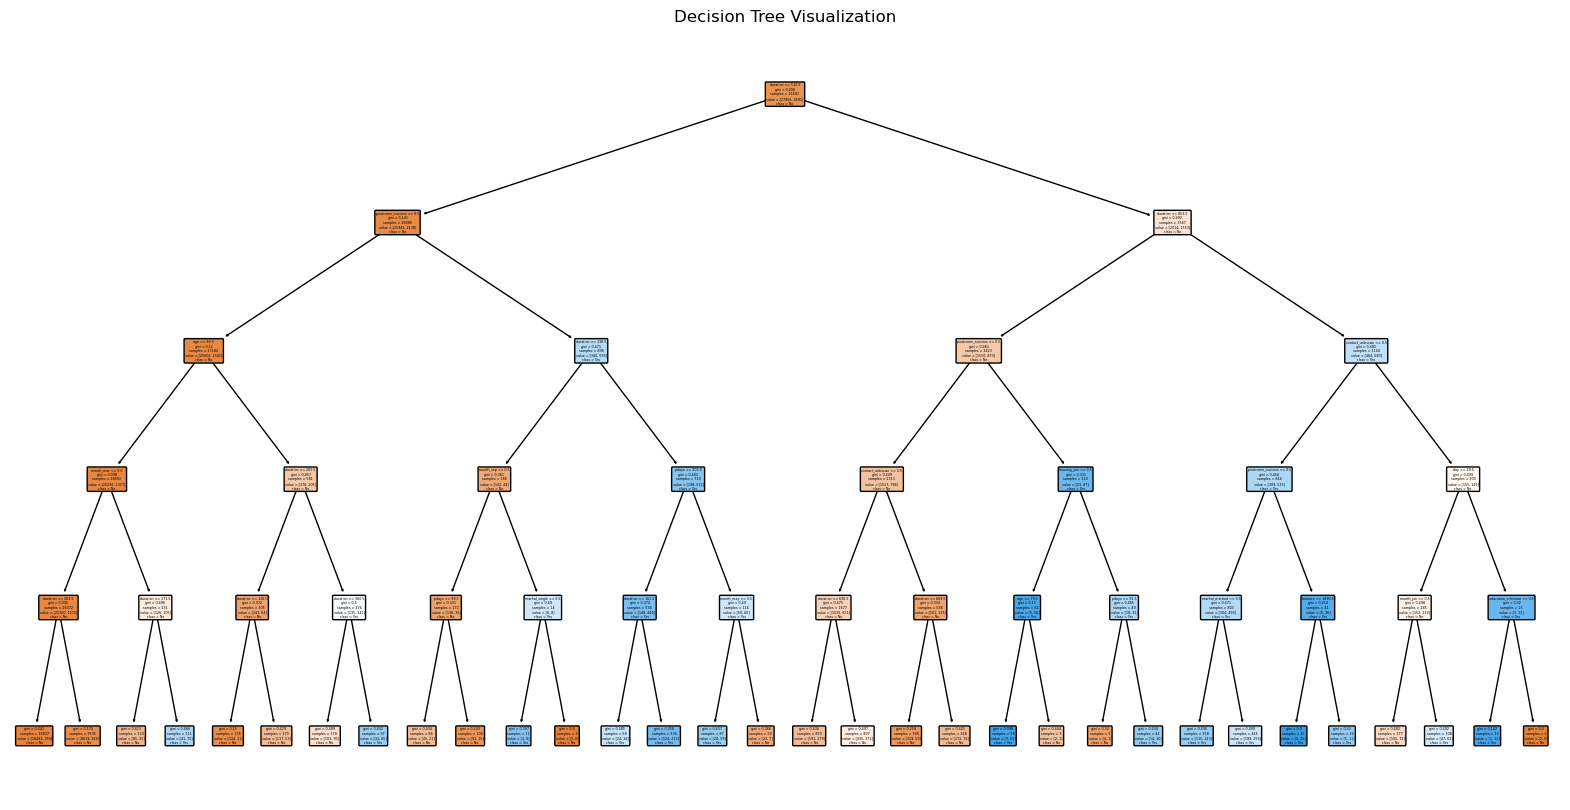

In [18]:
from sklearn.tree import plot_tree

# Assuming you have a trained DecisionTreeClassifier object named dt
feature_names_list = X.columns.tolist()  # Convert X.columns to a list

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=feature_names_list, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [19]:
# Hyperparameter Tuning

In [20]:

from sklearn.model_selection import GridSearchCV


In [21]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_dt = grid_search.best_estimator_

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


# Prediction on new data

In [22]:
# Example new customer data
new_customer_data = {
    'age': [35],
    'balance': [5000],
    'duration': [120],
    'campaign': [2],
    'pdays': [-1],
    'previous': [0],
    'job_technician': [1],
    'job_unknown': [0],
    'marital_married': [1],
    'marital_single': [0],
    'education_secondary': [1],
    'education_tertiary': [0],
    'default_yes': [0],
    'housing_yes': [1],
    'loan_yes': [0],
    'contact_cellular': [1],
    'contact_unknown': [0],
    'month_jun': [0],
    'month_may': [1],
    'month_nov': [0],
    'poutcome_success': [0]
}

# Convert to DataFrame
new_customer = pd.DataFrame(new_customer_data)

# Ensure all columns match
for col in X.columns:
    if col not in new_customer:
        new_customer[col] = 0  # Add missing columns with default value 0
new_customer = new_customer[X.columns]  # Reorder columns to match training data


In [23]:
# Predict for the new customer
prediction = best_dt.predict(new_customer)
print("Prediction:", "Yes" if prediction[0] == 1 else "No")


Prediction: No
